# Raw Data Files

1. flydubai Sep_Oct 21     # Base file 1
2. flyDubai Nov21_Dec21    # Base file 2
3. flydubai Jan22_Feb22    # Base file 3

4. flydubai SSR Sep21_Feb22    # Ancillary data file

# Data Preprocessing

The data we have is the passenger level data to convert the data into structured format we have to convert the data into per journey wise data.

Logic : if the journey type for the PNR is Return then replicating the row for single PNR with the combination of Origin and Destination.(If one way then single line for single PNR.)


In [19]:
# Base data

,year(departure_dt),month(departure_dt),from_airport,to_airport,confirmation_num,person_org_id,res_book_dt_lcl_key,departure_dt,journey_type,pax_type_cde,rev,booking
0,2021,10,DXB,FRU,M44L6M,152723640,2021-08-30 00:00:00,2021-10-02 00:00:00,RT,ADT,1007.45,1
1,2021,11,FRU,DXB,M44L6M,152723640,2021-08-30 00:00:00,2021-11-06 00:00:00,RT,ADT,690.00,1
2,2022,1,TLV,DXB,92ZLTD,162170563,2022-01-07 00:00:00,2022-01-13 00:00:00,OW,ADT,1175.36,1
3,2022,1,TLV,DXB,92ZLTD,162170562,2022-01-07 00:00:00,2022-01-13 00:00:00,OW,ADT,1330.10,1


In [21]:
# Converted Data

,confirmation_num,from_airport,to_airport,year(departure_dt),month(departure_dt),res_book_dt_lcl_key,departure_dt,journey_type,pax,rev,ADT,CHILD,INF
0,M44L6M,FRU,DXB,2021,11,2021-08-30 00:00:00,2021-11-06 00:00:00,RT,1,690.00,1,0,0
1,M44L6M,DXB,FRU,2021,10,2021-08-30 00:00:00,2021-10-02 00:00:00,RT,1,1007.45,1,0,0
2,92ZLTD,TLV,DXB,2022,1,2022-01-07 00:00:00,2022-01-13 00:00:00,OW,2,2505.46,2,0,0


# Checking Errors (Base Converted Data)

In [ ]:
# Error 1

Departure Date is Smaller than Flight Booking date

for example : 

  PNR    O   D   Year  Month    Flight Book Date       Departure date     J. Type   T.Pax  Revenue      A   C   I 
HTRZW0	BSR	DXB	 2021	12	   2021-12-12 00:00:00	  2021-12-11 00:00:00	OW	      2	   2178.78	    2	0	0

# Error 2

Only infant travelling
One child carrying one infant

for example :

  PNR    O   D   Year  Month    Flight Book Date       Departure date     J. Type   T.Pax  Revenue      A   C   I 
TAUCQA	DXB	HBE	 2021	11	   2021-01-14 00:00:00	2021-11-12 00:00:00	    OW	      0    	89.29	    0	0	1
EW4WWE	HBE	DXB	 2022	2	   2022-02-19 00:00:00	2022-02-22 00:00:00	    RT	      1	    489.15   	0	1	1

# Error 3

Different Journey type for same PNR with same Origin Destination

for example :

year   Month   O     D     PNR      P. ID       Flight Book Date      Departure date     J. Type   P.type    Revenue   pax
2022	1	  EBB	MED	 JPS2KK	163438161	2022-01-25 00:00:00	   2022-01-29 00:00:00	   OW	     ADT	 1105.57	1
2022	1	  EBB	MED	 JPS2KK	163438159	2022-01-25 00:00:00	   2022-01-29 00:00:00	   RT	     ADT	 1105.57	1
2022	1	  EBB	MED	 JPS2KK	163438160	2022-01-25 00:00:00	   2022-01-29 00:00:00	   OW	     ADT	 1105.57	1
2022	1	  EBB	MED	 JPS2KK	163438158	2022-01-25 00:00:00	   2022-01-29 00:00:00	   OW	     ADT	 1105.57	1
2022	1	  EBB	MED	 JPS2KK	163438164	2022-01-25 00:00:00	   2022-01-29 00:00:00	   OW	     ADT	 1105.57	1
2022	1	  EBB	MED	 JPS2KK	163438163	2022-01-25 00:00:00	   2022-01-29 00:00:00	   OW	     ADT	 1105.57	1
2022	1	  EBB	MED	 JPS2KK	163438157	2022-01-25 00:00:00	   2022-01-29 00:00:00	   OW	     ADT	 1105.57	1
2022	1	  EBB	MED	 JPS2KK	163438162	2022-01-25 00:00:00	   2022-01-29 00:00:00	   OW	     ADT	 1105.57	1
2022	1	  EBB	MED	 JPS2KK	163438156	2022-01-25 00:00:00	   2022-01-29 00:00:00	   OW	     ADT	 1498.73	1

# Removing Errors from the base Data (Skipping Error 3)

# Final Stats for Base Data Only 

Total Bookings = 368441
Total journeys = 520916

# Checking Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521532 entries, 0 to 521531
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   confirmation_num       521532 non-null  object 
 1   from_airport           521532 non-null  object 
 2   to_airport             521532 non-null  object 
 3   year(departure_dt)     521532 non-null  int64  
 4   month(departure_dt)    521532 non-null  int64  
 5   res_book_dt_lcl_key    521532 non-null  object 
 6   departure_dt           521532 non-null  object 
 7   journey_type           521532 non-null  object 
 8   pax                    521532 non-null  int64  
 9   rev                    521532 non-null  float64
 10  ADT                    521532 non-null  int64  
 11  CHILD                  521532 non-null  int64  
 12  INF                    521532 non-null  int64  
 13  Days before departure  521532 non-null  int64  
dtypes: float64(1), int64(7), object(6)
m

In [9]:
# Converting Date types from Object to Date

df["res_book_dt_lcl_key"] = pd.to_datetime(df["res_book_dt_lcl_key"])
df["departure_dt"] = pd.to_datetime(df["departure_dt"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521532 entries, 0 to 521531
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   confirmation_num       521532 non-null  object        
 1   from_airport           521532 non-null  object        
 2   to_airport             521532 non-null  object        
 3   year(departure_dt)     521532 non-null  int64         
 4   month(departure_dt)    521532 non-null  int64         
 5   res_book_dt_lcl_key    521532 non-null  datetime64[ns]
 6   departure_dt           521532 non-null  datetime64[ns]
 7   journey_type           521532 non-null  object        
 8   pax                    521532 non-null  int64         
 9   rev                    521532 non-null  float64       
 10  ADT                    521532 non-null  int64         
 11  CHILD                  521532 non-null  int64         
 12  INF                    521532 non-null  int6

# Checking Null Values

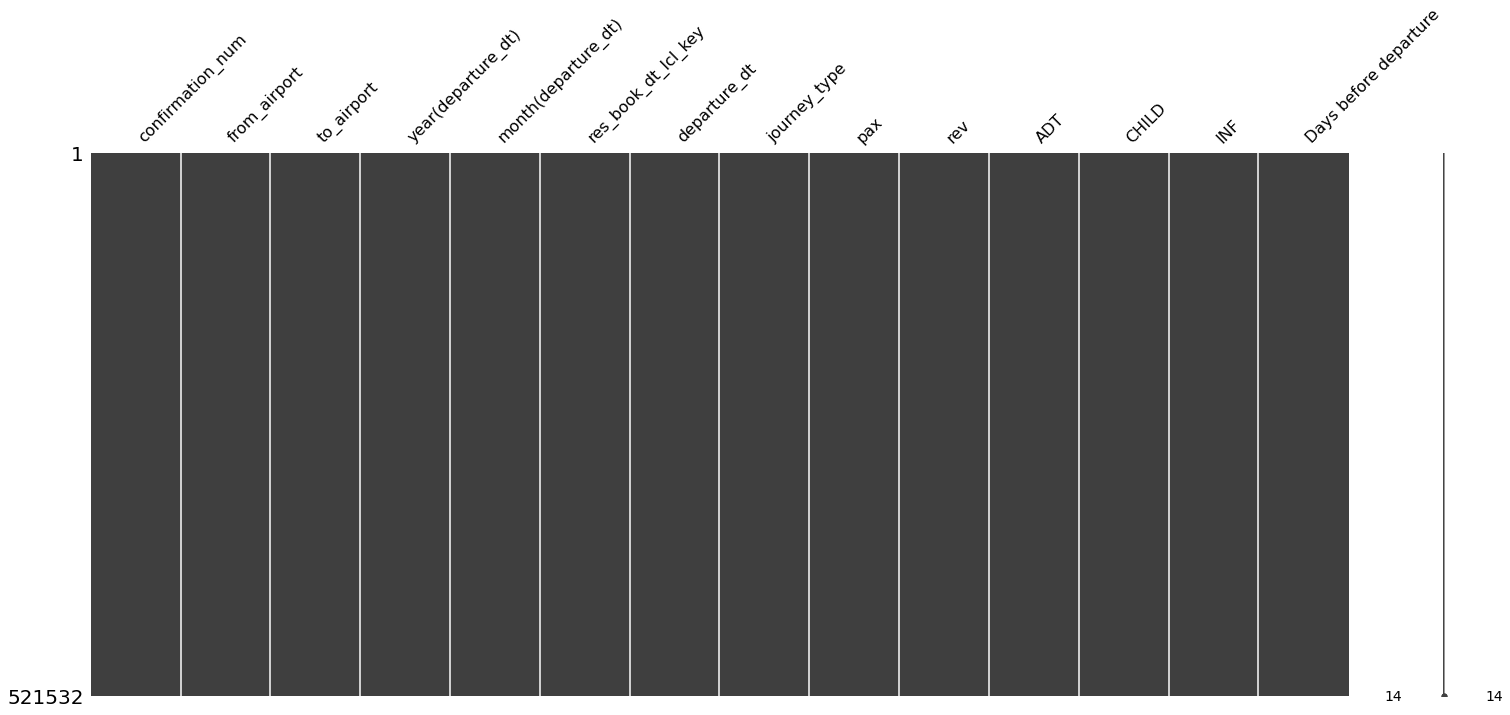

<Figure size 720x288 with 0 Axes>

In [24]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.figure(figsize = (10,4))
plt.show()

In [23]:
print("No Missing Values Present in the dataset")

No Missing Values Present in the dataset


# Checking Duplicated Values

In [21]:
df.duplicated().sum()

0

In [22]:
print("No dublicated Values Present in the dataset")

No dublicated Values Present in the dataset


# Describing The Data

In [28]:
df.describe()

,year(departure_dt),month(departure_dt),pax,rev,ADT,CHILD,INF,Days before departure
count,521532.000000,521532.000000,521532.000000,521532.000000,521532.000000,521532.000000,521532.000000,521532.000000
mean,2021.327456,7.675487,1.515125,1402.354356,1.395723,0.119402,0.026633,19.689714
std,0.469286,4.402647,0.965120,1420.565201,0.766028,0.434806,0.165159,28.617179
min,2021.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,1.000000,633.850000,1.000000,0.000000,0.000000,4.000000
50%,2021.000000,10.000000,1.000000,982.240000,1.000000,0.000000,0.000000,10.000000
75%,2022.000000,11.000000,2.000000,1643.222500,2.000000,0.000000,0.000000,24.000000
max,2022.000000,12.000000,9.000000,39888.800000,9.000000,7.000000,4.000000,884.000000


# Data Perprocessing (Ancillary Data)

In [ ]:
# Checking PNR which are present in the Anc Data but not in Base data

Total PNR = 31

For Example : NJJKWB , O4EZB8 , OHZFZX

# Final Stats for Ancillary Data Only 

Total Bookings = 103511



In [5]:
import pandas as pd
df = pd.read_excel("flydubai SSR Sep21_Feb22.xlsx")

# Checking Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259672 entries, 0 to 259671
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   pnr                  259672 non-null  object 
 1   leg_departure_date   259672 non-null  int64  
 2   od_flight_no         259672 non-null  object 
 3   leg_flight_no        259672 non-null  int64  
 4   from_od              259672 non-null  object 
 5   to_od                259672 non-null  object 
 6   from_leg             259672 non-null  object 
 7   to_leg               259672 non-null  object 
 8   ssr_code             259672 non-null  object 
 9   ssr_booked_date      259672 non-null  int64  
 10  ssr_booked_time      259672 non-null  object 
 11  ssr_booked_time_utc  259672 non-null  object 
 12  ssr_booked_channel   259672 non-null  int64  
 13  ssr_paid_revenue     259672 non-null  float64
 14  fare_brand_id        259672 non-null  int64  
 15  booking_channel_i

In [7]:
# Converting Date types from Object to Date

df["leg_departure_date"] = pd.to_datetime(df["leg_departure_date"])
df["ssr_booked_date"] = pd.to_datetime(df["ssr_booked_date"])
df["ssr_booked_time"] = pd.to_datetime(df["ssr_booked_time"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259672 entries, 0 to 259671
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pnr                  259672 non-null  object        
 1   leg_departure_date   259672 non-null  datetime64[ns]
 2   od_flight_no         259672 non-null  object        
 3   leg_flight_no        259672 non-null  int64         
 4   from_od              259672 non-null  object        
 5   to_od                259672 non-null  object        
 6   from_leg             259672 non-null  object        
 7   to_leg               259672 non-null  object        
 8   ssr_code             259672 non-null  object        
 9   ssr_booked_date      259672 non-null  datetime64[ns]
 10  ssr_booked_time      259672 non-null  datetime64[ns]
 11  ssr_booked_time_utc  259672 non-null  object        
 12  ssr_booked_channel   259672 non-null  int64         
 13  ssr_paid_reven

# Checking Null Values

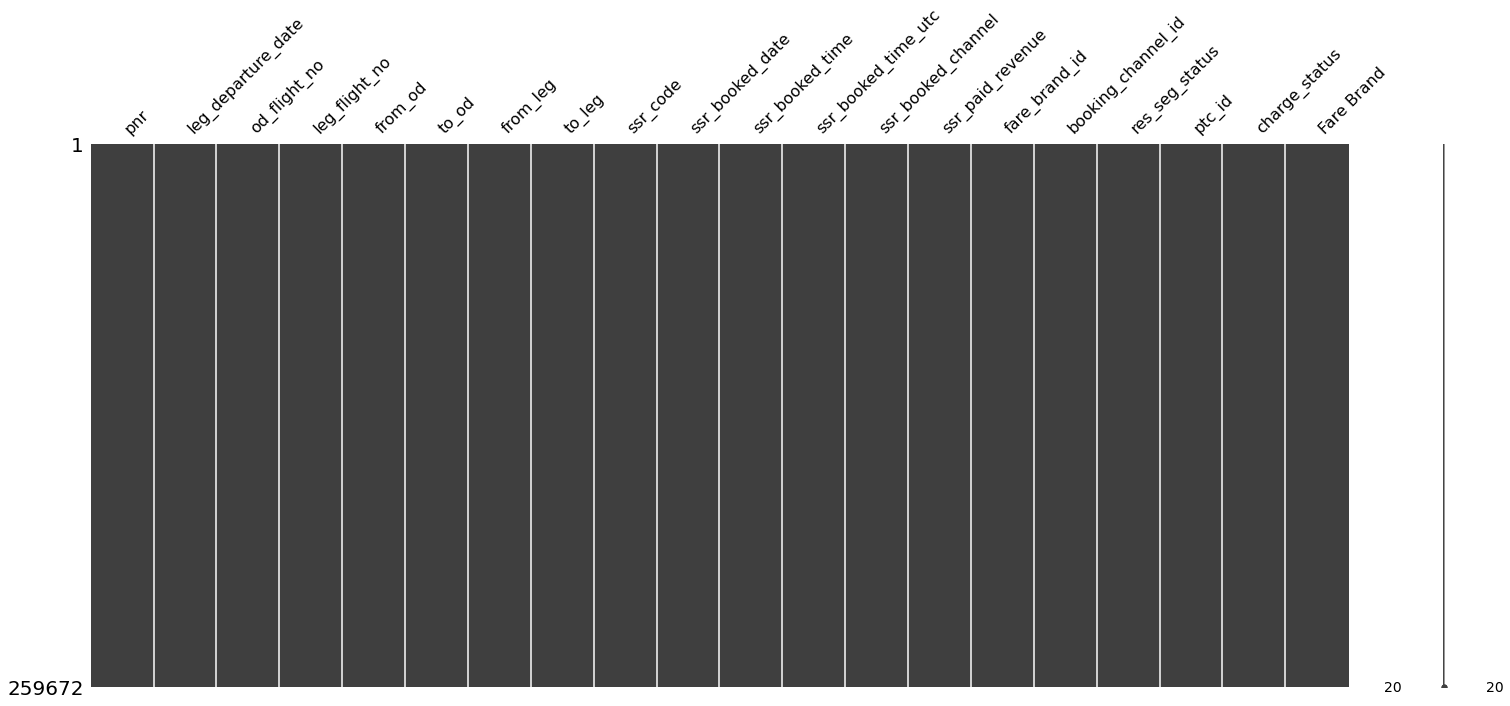

<Figure size 720x288 with 0 Axes>

In [10]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.figure(figsize = (10,4))
plt.show()

# Describing The Data

In [15]:
df.describe()

,leg_flight_no,ssr_booked_channel,ssr_paid_revenue,fare_brand_id,booking_channel_id,res_seg_status,ptc_id,charge_status
count,259672.000000,259672.000000,259672.000000,259672.000000,259672.0,259672.000000,259672.000000,259672.000000
mean,1955.758087,4.531682,86.273912,5.781340,2.0,5.113297,1.332107,0.952001
std,2637.635132,4.460553,80.275544,0.565759,0.0,0.677194,1.245052,0.213765
min,1.000000,1.000000,-514.220000,4.000000,2.0,1.000000,1.000000,0.000000
25%,440.000000,2.000000,30.360000,5.000000,2.0,5.000000,1.000000,1.000000
50%,916.000000,2.000000,55.100000,6.000000,2.0,5.000000,1.000000,1.000000
75%,1787.000000,5.000000,145.000000,6.000000,2.0,5.000000,1.000000,1.000000
max,8974.000000,19.000000,735.000000,7.000000,2.0,9.000000,6.000000,1.000000
